# Natural Language Processing 
Natural Language Processing (or NLP for short) that deals with the communication between natural (human) languages and computer languages. A common example of NLP is something like spellcheck or autocomplete. Essentially NLP is the field that focuses on how computers can understand and/or process natural/human languages. 

### Recurrent Neural Networks

It is a neural network that is much more capable of processing sequential data such as text or characters called a **Recurrent Neural Network** (RNN for short). 

We will learn how to use a reccurent neural network to do the following:
- Sentiment Analysis
- Character Generation 

## Sequence Data
In the previous lessons, we learned about data that doesn't change with time, like pictures. This time, we're diving into data that does change over time, like strings of text, weather patterns, or videos.

Imagine text as a sequence of words that follow a specific order. To make sense of this kind of data, we need to handle it differently. Treating an entire paragraph as one chunk of data wouldn't help us understand it well. Instead, we treat text as a sequence and process it one word at a time(like tokens). This way, we can keep track of where each word is and figure out the meaning of the text.

## Encoding Text
As we know machine learning models and neural networks don't take raw text data as an input. This means we must somehow encode our textual data to numeric values that our models can understand. There are many different ways of doing this and we will look at a few examples below. 

Before we get into the different encoding/preprocessing methods let's understand the information we can get from textual data by looking at the following two movie reviews.

```I thought the movie was going to be bad, but it was actually amazing!```

```I thought the movie was going to be amazing, but it was actually bad!```

Although these two setences are very similar we know that they have very different meanings. This is because of the **ordering** of words, a very important property of textual data.

Now keep that in mind while we consider some different ways of encoding our textual data.

### 1. Bag of Words
The first and simplest way to encode our data is to use something called **bag of words**. This is a pretty easy technique where each word in a sentence is encoded with an integer and thrown into a collection that does not maintain the order of the words but does keep track of the frequency.

In [3]:
vocab = {}  # maps word to integer representing it
word_encoding = 1
def bag_of_words(text):
  global word_encoding

  words = text.lower().split(" ")  # create a list of all of the words in the text, well assume there is no grammar in our text for this example
  bag = {}  # stores all of the encodings and their frequency

  for word in words:
    if word in vocab:
      encoding = vocab[word]  # get encoding from vocab
    else:
      vocab[word] = word_encoding
      encoding = word_encoding
      word_encoding += 1
    
    if encoding in bag:
      bag[encoding] += 1
    else:
      bag[encoding] = 1
  
  return bag

text = "this is a test to see if this test will work is is test a a"
bag = bag_of_words(text)
print(bag)
print(vocab)

{1: 2, 2: 3, 3: 3, 4: 3, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1}
{'this': 1, 'is': 2, 'a': 3, 'test': 4, 'to': 5, 'see': 6, 'if': 7, 'will': 8, 'work': 9}


Notice that we've lost the order in which words appear. In fact, let's look at how this encoding works for the two sentences we showed above.

In [4]:
positive_review = "I thought the movie was going to be bad but it was actually amazing"
negative_review = "I thought the movie was going to be amazing but it was actually bad"

pos_bag = bag_of_words(positive_review)
neg_bag = bag_of_words(negative_review)

print("Positive:", pos_bag)
print("Negative:", neg_bag)

Positive: {10: 1, 11: 1, 12: 1, 13: 1, 14: 2, 15: 1, 5: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1}
Negative: {10: 1, 11: 1, 12: 1, 13: 1, 14: 2, 15: 1, 5: 1, 16: 1, 21: 1, 18: 1, 19: 1, 20: 1, 17: 1}


We can see that even though these sentences have a very different meaning they are encoded exaclty the same way. Obviously, this isn't going to work in real world scenario. Let's look at some other methods.

### 2. Integer Encoding
The next technique we will look at is called **integer encoding**. This involves representing each word or character in a sentence as a unique integer and maintaining the order of these words. This should hopefully fix the problem we saw before were we lost the order of words.

In [5]:
vocab = {}  
word_encoding = 1
def one_hot_encoding(text):
  global word_encoding

  words = text.lower().split(" ") 
  encoding = []  

  for word in words:
    if word in vocab:
      code = vocab[word]  
      encoding.append(code) 
    else:
      vocab[word] = word_encoding
      encoding.append(word_encoding)
      word_encoding += 1
  
  return encoding

text = "this is a test to see if this test will work is is test a a"
encoding = one_hot_encoding(text)
print(encoding)
print(vocab)

[1, 2, 3, 4, 5, 6, 7, 1, 4, 8, 9, 2, 2, 4, 3, 3]
{'this': 1, 'is': 2, 'a': 3, 'test': 4, 'to': 5, 'see': 6, 'if': 7, 'will': 8, 'work': 9}


In [6]:
positive_review = "I thought the movie was going to be bad but it was actually amazing"
negative_review = "I thought the movie was going to be amazing but it was actually bad"

pos_bag = one_hot_encoding(positive_review)
neg_bag = one_hot_encoding(negative_review)

print("Positive:", pos_bag)
print("Negative:", neg_bag)

Positive: [10, 11, 12, 13, 14, 15, 5, 16, 17, 18, 19, 14, 20, 21]
Negative: [10, 11, 12, 13, 14, 15, 5, 16, 21, 18, 19, 14, 20, 17]


So, In summary
- **"Bag of words"** counts the frequency of each word.
- **"Integer Encoding"** or **"one hot encoding"** encodes each word using its assigned integer encoding.

Now, we are keeping track of the order of words and we can tell where each occurs. But this still has a few issues with it. Ideally when we encode words, we would like similar words to have similar labels and different words to have very different labels.
**For example**,
- The words happy and joyful should probably have very similar labels so we can determine that they are similar.
- While words like horrible and amazing should probably have very different labels.

The method we looked at above won't be able to do something like this for us. This could mean that the model will have a very difficult time determing if two words are similar or not which could result to significant performance problems.

### 3. Word Embeddings
Luckily there is a third method that is far superior, **word embeddings**. This method keeps the order of words as well as encodes similar words with very similar labels. It attempts to not only encode the frequency and order of words but the meaning of those words in the sentence. It encodes each word as a dense vector that represents its context in the sentence.

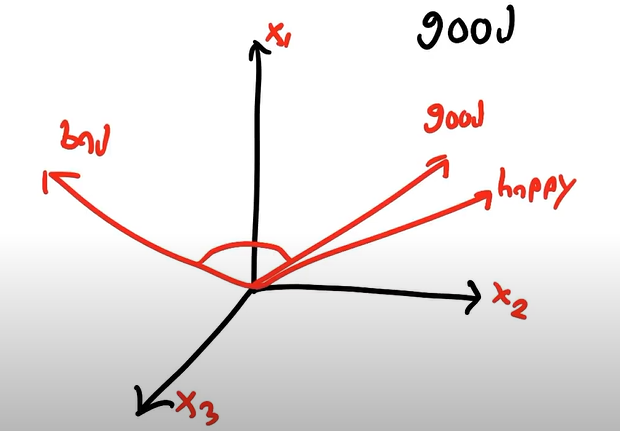

Unlike the previous techniques word embeddings are learned by looking at many different training examples. You can add what's called an *embedding layer* to the beggining of your model and while your model trains your embedding layer will learn the correct embeddings for words. You can also use pretrained embedding layers.

# Recurrent Neural Networks (RNN's)

We've looked at how to encode text, and now we'll explore Recurrent Neural Networks (RNNs). Previously, we used feed-forward neural networks where all the data goes through the network at once. However, this doesn't work well for text because we read and understand text word by word, not all at once. Humans read left to right, keeping track of sentence meaning as we go. RNNs are designed for this process.

RNNs have a loop inside, which means they process words one by one while remembering what they've seen before. This helps them understand words based on sentence order and build a full understanding gradually.

In simple words, we treat text as a sequence so that we can send one word at a time to the RNN.

Let's have a look at what a recurrent layer might look like.
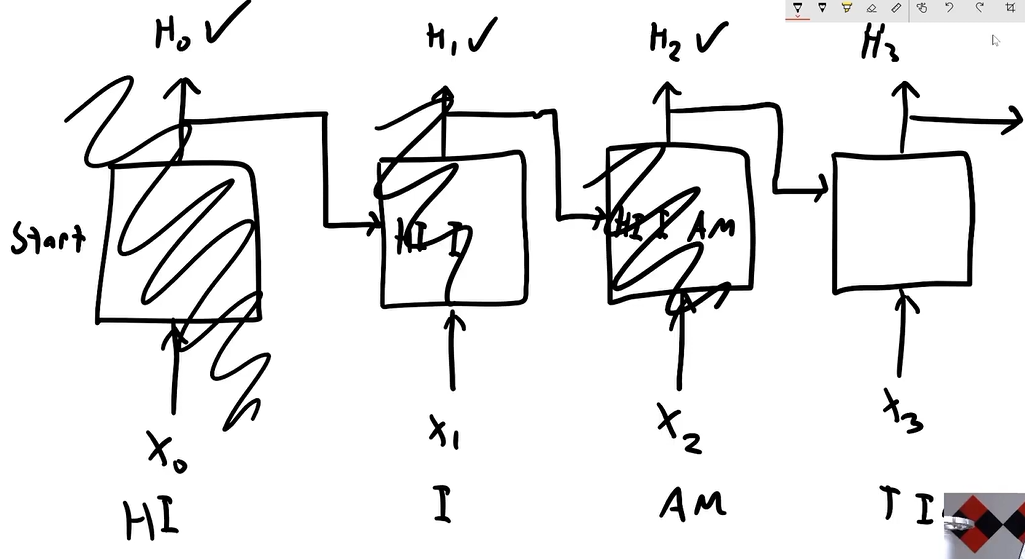

What this diagram is trying to illustrate is that a recurrent layer processes words or input one at a time in a combination with the output from the previous iteration. So, as we progress further in the input sequence, we build a more complex understanding of the text as a whole.

What we've just looked at is called a **simple RNN layer**. It can be effective at processing shorter sequences of text for simple problems but has many downfalls associated with it. One of them being the fact that as text sequences get longer it gets increasingly difficult for the network to understand the text properly.

## LSTM
- We talked about a type of recurrent layer called **simpleRNN**, but there's a more advanced one called **LSTM (Long Short-Term Memory)**. It's like an upgraded version of simpleRNN. While simpleRNN loses information from earlier steps as it processes, LSTM can keep track of input from any step in the past. It's like having a memory that stores all the inputs and when they occurred.

- With LSTM, our network becomes more complex. It can access previous information whenever needed, allowing it to find better relationships between inputs and their timing.

- They're a more powerful version of recurrent layers.